<a href="https://colab.research.google.com/github/freida20git/child-age-classification/blob/main/filteredShortText_bert_finetuning1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd

drive.mount('/content/drive')

# EDA, dividing to classes according to age ranges, train/val/test sets and filtering:

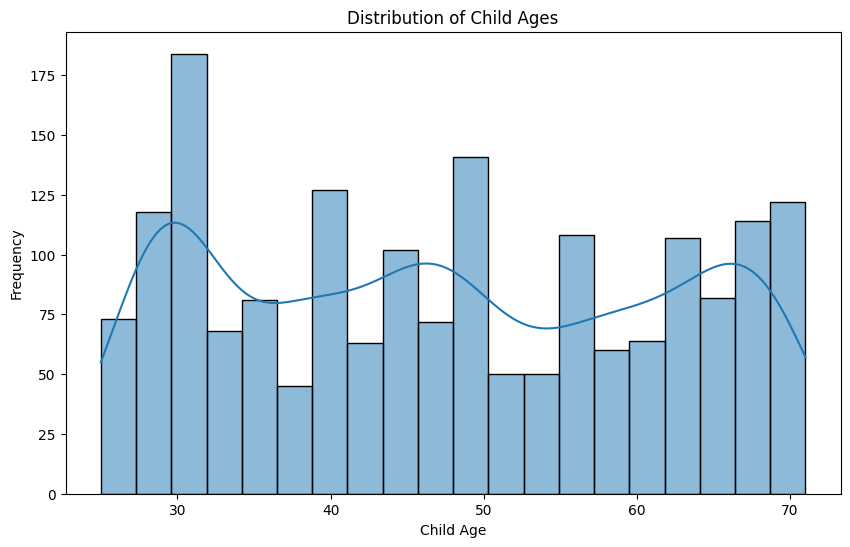

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# histogram of child ages
plt.figure(figsize=(10, 6))
sns.histplot(df['child_age'].dropna(), kde=True, bins=20)
plt.title('Distribution of Child Ages')
plt.xlabel('Child Age')
plt.ylabel('Frequency')
plt.show()

we could divide:

Range 1:  24-36  (Toddler: 2-3 years)

Range 2:  37-48  (Preschool 3-4 years)

Range 3:  49-72  (Older child: 4-6 years)


In [ ]:
bins = [24, 36, 48, 72]
labels = ["2_3", "3_4", "4_6"]

# Create the new column
df["class_range"] = pd.cut(df["child_age"], bins=bins, labels=labels, right=True)


In [ ]:
df

,child_text,child_age,child_name,conversation,child_gender,corpus_name,file_name,child_group,class_range
0,I got the UNRECOGNIZED_WORD Barbie. I like tha...,61.0,Fletcher_Claire_K,"[('INV', 'this is something my sister got for ...",female,Fletcher,ChildCorpus/Eng-UK/Fletcher/5/hnclak.cha,TD,4_6
1,what?. that one?. no. I want cookie. I want co...,30.0,Morisset_Jenny,"[('MOT', 'look Lovey'), ('CHI', 'what?'), ('MO...",female,Morisset,ChildCorpus/Eng-NA/Morisset/Seattle/823m30.cha,"cross, toyplay, TD",2_3
2,my open it up. a mirror. can't see anything?. ...,29.0,Tommerdahl_ECG,"[('MOT', ""what've you got there?""), ('CHI', 'm...",female,Tommerdahl,ChildCorpus/Eng-UK/Tommerdahl/ECG2.cha,"cross, toyplay, TD",2_3
3,um. Mommy I can't read!. I don't know. no UNRE...,67.0,HSLLD_trire,"[('INV', 'okay you can just tell me the story ...",female,HSLLD,ChildCorpus/Eng-NA/HSLLD/HV3/RE/trire3.cha,"long, reading, TD",4_6
4,and the and the annnnd and then I saw what hap...,71.0,Hicks_Julia,"[('EXP', 'okay this is Julia and Deborah for t...",female,Hicks,ChildCorpus/Eng-NA/Hicks/Kinder/report/rep053.cha,"cross, narrative, TD",4_6
...,...,...,...,...,...,...,...,...,...
1826,mhm. UNRECOGNIZED_WORD. leaf. mhm. what this?....,45.0,HSLLD_zenbr,"[('MOT', 'okay'), ('MOT', 'this is called the ...",female,HSLLD,ChildCorpus/Eng-NA/HSLLD/HV1/BR/zenbr1.cha,"long, book, TD",3_4
1827,yeah. I wanna drink of water. toys in there?. ...,30.0,Morisset_Jeremiah,"[('MOT', 'you hungry?'), ('CHI', 'yeah'), ('MO...",male,Morisset,ChildCorpus/Eng-NA/Morisset/Topeka/184m30t.cha,"cross, toyplay, TD",2_3
1828,yeah!. head. eyes!. nose!. ears!. what?. yeah!...,46.0,HSLLD_maybr,"[('MOT', ""it looks like a little worm but I th...",female,HSLLD,ChildCorpus/Eng-NA/HSLLD/HV1/BR/maybr1.cha,"long, book, TD",3_4
1829,UNRECOGNIZED_WORD. yeah. no. yeah. a bunny. an...,29.0,NewEngland_Erin,"[('MOT', 'look'), ('MOT', 'look'), ('CHI', 'UN...",female,NewEngland,ChildCorpus/Eng-NA/NewEngland/32/04.cha,TD,2_3


dividing into train validation and test with no child names overlapping in the sets so theres no leakege in test/evaluation.

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

#Get unique children
unique_children = df["child_name"].unique()

# Split children into train (60%) and temp (40%)
train_children, temp_children = train_test_split(unique_children, test_size=0.4, random_state=42)

# Split temp into validation (20%) and test (20%)
val_children, test_children = train_test_split(temp_children, test_size=0.5, random_state=42)

# Assign rows to splits based on child_name
train_df = df[df["child_name"].isin(train_children)].reset_index(drop=True)
val_df   = df[df["child_name"].isin(val_children)].reset_index(drop=True)
test_df  = df[df["child_name"].isin(test_children)].reset_index(drop=True)

# sanity check
assert set(train_df["child_name"]).isdisjoint(val_df["child_name"])
assert set(train_df["child_name"]).isdisjoint(test_df["child_name"])
assert set(val_df["child_name"]).isdisjoint(test_df["child_name"])

print("Number of children in each split:")
print("Train:", train_df["child_name"].nunique())
print("Validation:", val_df["child_name"].nunique())
print("Test:", test_df["child_name"].nunique())

print("Number of rows in each split:")
print("Train:", len(train_df))
print("Validation:", len(val_df))
print("Test:", len(test_df))


Number of children in each split:
Train: 661
Validation: 221
Test: 221
Number of rows in each split:
Train: 1096
Validation: 385
Test: 350


In [ ]:
train_df

,child_text,child_age,child_name,conversation,child_gender,corpus_name,file_name,child_group,class_range
0,I got the UNRECOGNIZED_WORD Barbie. I like tha...,61.0,Fletcher_Claire_K,"[('INV', 'this is something my sister got for ...",female,Fletcher,ChildCorpus/Eng-UK/Fletcher/5/hnclak.cha,TD,4_6
1,what?. that one?. no. I want cookie. I want co...,30.0,Morisset_Jenny,"[('MOT', 'look Lovey'), ('CHI', 'what?'), ('MO...",female,Morisset,ChildCorpus/Eng-NA/Morisset/Seattle/823m30.cha,"cross, toyplay, TD",2_3
2,and the and the annnnd and then I saw what hap...,71.0,Hicks_Julia,"[('EXP', 'okay this is Julia and Deborah for t...",female,Hicks,ChildCorpus/Eng-NA/Hicks/Kinder/report/rep053.cha,"cross, narrative, TD",4_6
3,I w I wan a read it. no!. a moon. the sky. a c...,45.0,HSLLD_donbr,"[('CHI', 'I w I wan a read it'), ('MOT', 'can ...",male,HSLLD,ChildCorpus/Eng-NA/HSLLD/HV1/BR/donbr1.cha,"long, book, TD",3_4
4,um uh a doggie. um UNRECOGNIZED_WORD. um. um a...,25.0,Demetras2_Tim,"[('FAT', ""what's that one?""), ('CHI', 'um uh a...",male,Demetras2,ChildCorpus/Eng-NA/Demetras2/Tim/father/020130...,TD,2_3
...,...,...,...,...,...,...,...,...,...
1091,yeah. hi. yeah. my sister is Zoey. she is thre...,38.0,Weist_Benjamin,"[('MOT', ""this is the first tape we're making ...",NaN,Weist,ChildCorpus/Eng-NA/Weist/Ben/030221.cha,"long, toyplay, TD",3_4
1092,I opened Skipper after. I was playin with her ...,48.0,HSLLD_trier,"[('MOT', 'can you tell us about your birthday?...",female,HSLLD,ChildCorpus/Eng-NA/HSLLD/HV1/ER/trier1.cha,"long, narrative, TD",3_4
1093,mhm. UNRECOGNIZED_WORD. leaf. mhm. what this?....,45.0,HSLLD_zenbr,"[('MOT', 'okay'), ('MOT', 'this is called the ...",female,HSLLD,ChildCorpus/Eng-NA/HSLLD/HV1/BR/zenbr1.cha,"long, book, TD",3_4
1094,yeah. I wanna drink of water. toys in there?. ...,30.0,Morisset_Jeremiah,"[('MOT', 'you hungry?'), ('CHI', 'yeah'), ('MO...",male,Morisset,ChildCorpus/Eng-NA/Morisset/Topeka/184m30t.cha,"cross, toyplay, TD",2_3


filter non relevant columns:

In [ ]:
# Define the columns to keep
columns_to_keep = [ "child_text", "class_range"]

# Keep only those columns
train_df = train_df[columns_to_keep].copy()
val_df   = val_df[columns_to_keep].copy()
test_df  = test_df[columns_to_keep].copy()

# check columns
print("Train columns:", train_df.columns.tolist())
print("Validation columns:", val_df.columns.tolist())
print("Test columns:", test_df.columns.tolist())


Train columns: ['child_text', 'class_range']
Validation columns: ['child_text', 'class_range']
Test columns: ['child_text', 'class_range']


In [ ]:
import os
train_df.to_csv(os.path.join("/content/drive/MyDrive/age classification/train.csv"), index=False)
val_df.to_csv(os.path.join("/content/drive/MyDrive/age classification/validation.csv"), index=False)
test_df.to_csv(os.path.join("/content/drive/MyDrive/age classification/test.csv"), index=False)

print("Datasets saved successfully!")

Datasets saved successfully!


Start tokenization and training:


#filter short texts:

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

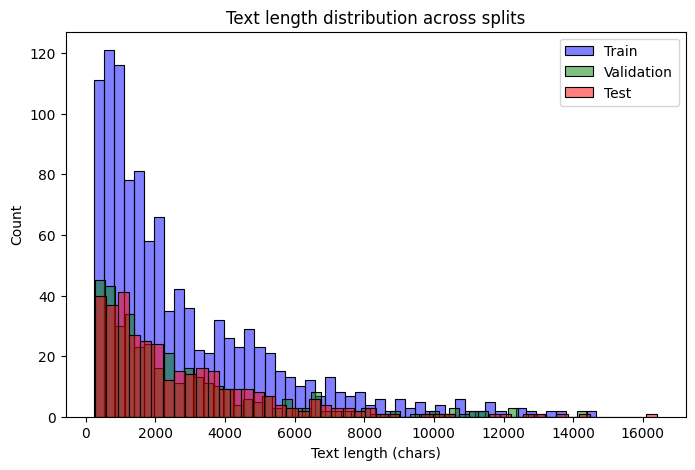

In [56]:

data_path = "/content/drive/MyDrive/age classification/"

# Load datasets
train_df = pd.read_csv(os.path.join(data_path, "train.csv"))
val_df = pd.read_csv(os.path.join(data_path, "validation.csv"))
test_df = pd.read_csv(os.path.join(data_path, "test.csv"))

# Compute text length
for df in [train_df, val_df, test_df]:
    df["text_len"] = df["child_text"].apply(len)

# --- OPTION 2: Combined plot ---
plt.figure(figsize=(8, 5))
sns.histplot(train_df["text_len"], bins=50, color="blue", label="Train", alpha=0.5)
sns.histplot(val_df["text_len"], bins=50, color="green", label="Validation", alpha=0.5)
sns.histplot(test_df["text_len"], bins=50, color="red", label="Test", alpha=0.5)
plt.xlabel("Text length (chars)")
plt.ylabel("Count")
plt.title("Text length distribution across splits")
plt.legend()
plt.show()


In [58]:
# Compute text length
for df in [train_df, val_df, test_df]:
    df["text_len"] = df["child_text"].apply(len)

# Filter function
def filter_by_length(df, min_len=1500):
    filtered = df[df["text_len"] >= min_len].copy()
    print(f"Original size: {len(df)}, Filtered size: {len(filtered)}, Dropped: {len(df) - len(filtered)}")
    return filtered

# Apply filter
filtered_train_df = filter_by_length(train_df, 1500)
filtered_val_df = filter_by_length(val_df, 1500)
filtered_test_df = filter_by_length(test_df, 1500)

# (Optional) Save filtered datasets
filtered_train_df.to_csv(os.path.join(data_path, "train_filtered_1500.csv"), index=False)
filtered_val_df.to_csv(os.path.join(data_path, "val_filtered_1500.csv"), index=False)
filtered_test_df.to_csv(os.path.join(data_path, "test_filtered_1500.csv"), index=False)


Original size: 1096, Filtered size: 635, Dropped: 461
Original size: 385, Filtered size: 223, Dropped: 162
Original size: 350, Filtered size: 210, Dropped: 140


# Data and tokenization:

In [ ]:
# Install Pytorch & other libraries
%pip install "torch==2.5.0" "torchvision==0.20.0"
%pip install "setuptools<71.0.0" scikit-learn

# Install Hugging Face libraries
%pip install  --upgrade \
  "datasets==3.1.0" \
  "accelerate==1.2.1" \
  "hf-transfer==0.1.8"

# ModernBERT is not yet available in an official release, so we need to install it from github
%pip install "git+https://github.com/huggingface/transformers.git@6e0515e99c39444caae39472ee1b2fd76ece32f1" --upgrade


In [3]:
!pip install datasets transformers --quiet

In [13]:
from datasets import load_dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer, EarlyStoppingCallback
import numpy as np
import torch


In [14]:
model_name = "prajjwal1/bert-tiny"

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained(model_name)

# Load model for classification with 3 labels
num_labels = 3
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at prajjwal1/bert-tiny and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [15]:
def tokenize_function(examples):
    return tokenizer(
        examples["child_text"],
        padding="max_length",  # pad to max_length
        truncation=True,       # truncate longer text
        max_length=512          # adjust if needed
    )


In [16]:
import os
from datasets import load_dataset
data_path = "/content/drive/MyDrive/age classification/"

dataset = load_dataset('csv',
                       data_files={
                           'train': os.path.join(data_path, 'train_filtered_1500.csv'),
                           'validation': os.path.join(data_path, 'val_filtered_1500.csv'),
                           'test': os.path.join(data_path, 'test_filtered_1500.csv')
                       })


In [17]:
# Map tokenization over dataset
tokenized_datasets = dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/223 [00:00<?, ? examples/s]

In [18]:
label_map = {"2_3": 0, "3_4": 1, "4_6": 2}

def encode_labels(example):
    example["labels"] = label_map[example["class_range"]]
    return example

tokenized_datasets = tokenized_datasets.map(encode_labels)


Map:   0%|          | 0/223 [00:00<?, ? examples/s]

In [19]:
tokenized_datasets.set_format(type='torch', columns=['input_ids', 'attention_mask', 'labels'])

# Training:

In [70]:
from transformers import TrainingArguments, Trainer, EarlyStoppingCallback
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    save_strategy="epoch",
    logging_strategy="epoch",  # log at the end of each epoch
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=100,
    learning_rate=5e-5,
    load_best_model_at_end=True,
    report_to=[]  # disables W&B
)

early_stopping = EarlyStoppingCallback(early_stopping_patience=4)

def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    return {
        "accuracy": accuracy_score(p.label_ids, preds),
        "f1": f1_score(p.label_ids, preds, average="weighted")
    }

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['validation'],
    compute_metrics=compute_metrics,
    callbacks=[early_stopping]
)


## **Freeze BERT first (train only classifier head):**

In [71]:
for param in model.bert.parameters():
    param.requires_grad = False

In [72]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.097000,1.084542,0.448430,0.363504
2,1.082200,1.068621,0.484305,0.316042
3,1.072300,1.061213,0.484305,0.316042
4,1.068000,1.058483,0.484305,0.316042
5,1.063600,1.056716,0.484305,0.316042
6,1.066500,1.052718,0.484305,0.316042
7,1.059900,1.051595,0.484305,0.316042
8,1.065600,1.050840,0.484305,0.316042
9,1.060800,1.049094,0.484305,0.316042
10,1.061600,1.047867,0.484305,0.316042


TrainOutput(global_step=2720, training_loss=1.047890872113845, metrics={'train_runtime': 34.6119, 'train_samples_per_second': 1834.632, 'train_steps_per_second': 115.567, 'total_flos': 54876742103040.0, 'train_loss': 1.047890872113845, 'epoch': 68.0})

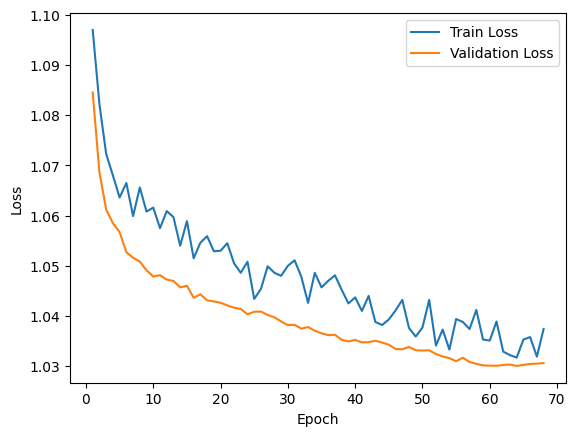

In [73]:
import pandas as pd
import matplotlib.pyplot as plt

logs = pd.DataFrame(trainer.state.log_history)

# Extract only train and eval losses
train_logs = logs[logs['loss'].notna()]
eval_logs = logs[logs['eval_loss'].notna()]

plt.plot(train_logs['epoch'], train_logs['loss'], label='Train Loss')
plt.plot(eval_logs['epoch'], eval_logs['eval_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [74]:
trainer.save_model("/content/drive/MyDrive/age_classification/model_top_only_filtered1500")

metrics_top = trainer.evaluate(tokenized_datasets['test'])
print("Top-layer only metrics:", metrics_top)


Top-layer only metrics: {'eval_loss': 1.0534662008285522, 'eval_accuracy': 0.44285714285714284, 'eval_f1': 0.29304025758214813, 'eval_runtime': 0.4268, 'eval_samples_per_second': 492.012, 'eval_steps_per_second': 32.801, 'epoch': 68.0}


In [75]:
#test:
predictions = trainer.predict(test_dataset=tokenized_datasets['test'])
preds = np.argmax(predictions.predictions, axis=1)  # convert logits to class labels
labels = predictions.label_ids

from sklearn.metrics import accuracy_score, f1_score, classification_report

print("Accuracy:", accuracy_score(labels, preds))
print("F1:", f1_score(labels, preds, average="weighted"))
print(classification_report(labels, preds))


Accuracy: 0.44285714285714284
F1: 0.29304025758214813
              precision    recall  f1-score   support

           0       0.50      0.06      0.11        63
           1       0.00      0.00      0.00        58
           2       0.44      1.00      0.61        89

    accuracy                           0.44       210
   macro avg       0.31      0.35      0.24       210
weighted avg       0.34      0.44      0.29       210



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


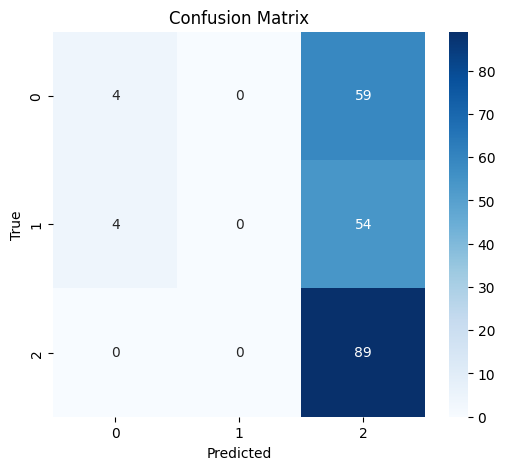

In [76]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(labels, preds)

# Plot as heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


## **Unfreeze BERT and train whole model:**

In [84]:
import shutil
shutil.rmtree("./results")  # remove old folder entirely

from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(
    "prajjwal1/bert-tiny",
    num_labels=3  # your number of classes
)


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at prajjwal1/bert-tiny and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [85]:
from transformers import TrainingArguments, Trainer, EarlyStoppingCallback
import numpy as np
from sklearn.metrics import accuracy_score, f1_score

training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",
    save_strategy="epoch",
    logging_strategy="epoch",  # log at the end of each epoch
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=100,
    learning_rate=5e-5,
    load_best_model_at_end=True,
    report_to=[]  # disables W&B
)

early_stopping = EarlyStoppingCallback(early_stopping_patience=3)

def compute_metrics(p):
    preds = np.argmax(p.predictions, axis=1)
    return {
        "accuracy": accuracy_score(p.label_ids, preds),
        "f1": f1_score(p.label_ids, preds, average="weighted")
    }

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['validation'],
    compute_metrics=compute_metrics,
    callbacks=[early_stopping]
)


In [86]:
for param in model.bert.parameters():
    param.requires_grad = True

trainer.args.learning_rate = 2e-5 # use lower learning rate (e.g., 2e-5) for stability
trainer.train()


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,1.103700,1.073251,0.484305,0.316042
2,1.068800,1.054664,0.484305,0.316042
3,1.060000,1.043975,0.488789,0.326611
4,1.052400,1.037532,0.488789,0.326611
5,1.040700,1.024705,0.502242,0.354164
6,1.021500,0.991055,0.529148,0.401246
7,0.992000,0.975877,0.547085,0.428649
8,0.969800,0.945841,0.569507,0.463300
9,0.924600,0.917159,0.600897,0.499774
10,0.887600,0.907514,0.591928,0.490051


TrainOutput(global_step=880, training_loss=0.8652315703305331, metrics={'train_runtime': 27.514, 'train_samples_per_second': 2307.913, 'train_steps_per_second': 145.38, 'total_flos': 17754240092160.0, 'train_loss': 0.8652315703305331, 'epoch': 22.0})

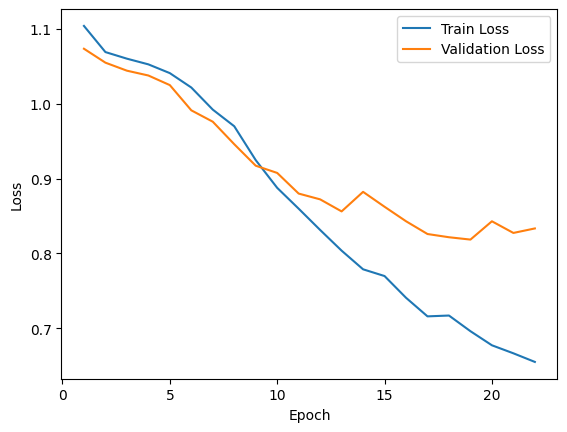

In [87]:
import pandas as pd
import matplotlib.pyplot as plt

logs = pd.DataFrame(trainer.state.log_history)

# Extract only train and eval losses
train_logs = logs[logs['loss'].notna()]
eval_logs = logs[logs['eval_loss'].notna()]

plt.plot(train_logs['epoch'], train_logs['loss'], label='Train Loss')
plt.plot(eval_logs['epoch'], eval_logs['eval_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [88]:
trainer.save_model("/content/drive/MyDrive/age_classification/model_full_finetune_filtered1500")

metrics_full = trainer.evaluate(tokenized_datasets['test'])
print("Full model metrics:", metrics_full)


Full model metrics: {'eval_loss': 0.7951984405517578, 'eval_accuracy': 0.6333333333333333, 'eval_f1': 0.5470920248800821, 'eval_runtime': 0.1562, 'eval_samples_per_second': 1344.238, 'eval_steps_per_second': 89.616, 'epoch': 22.0}


In [89]:
#test:
predictions = trainer.predict(test_dataset=tokenized_datasets['test'])
preds = np.argmax(predictions.predictions, axis=1)  # convert logits to class labels
labels = predictions.label_ids

from sklearn.metrics import accuracy_score, f1_score, classification_report

print("Accuracy:", accuracy_score(labels, preds))
print("F1:", f1_score(labels, preds, average="weighted"))
print(classification_report(labels, preds))


Accuracy: 0.6333333333333333
F1: 0.5470920248800821
              precision    recall  f1-score   support

           0       0.77      0.73      0.75        63
           1       0.14      0.02      0.03        58
           2       0.60      0.97      0.74        89

    accuracy                           0.63       210
   macro avg       0.50      0.57      0.51       210
weighted avg       0.52      0.63      0.55       210



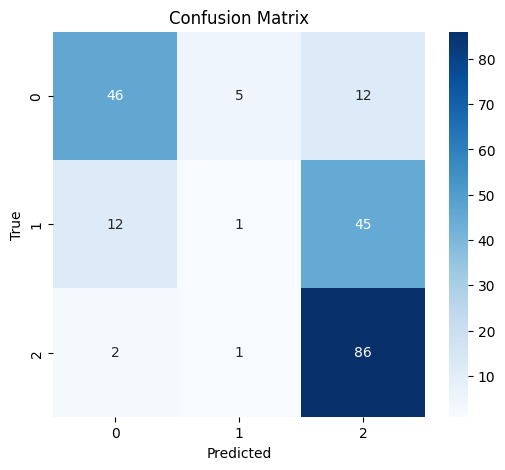

In [90]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(labels, preds)

# Plot as heatmap
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1,2], yticklabels=[0,1,2])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


# Error Analysis fine tuned last layer:

In [51]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

model_path = "/content/drive/MyDrive/age_classification_models/model_top_only_filtered1500"
# Load tokenizer from the original pretrained model
pretrained_model_name = "prajjwal1/bert-tiny"
tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_path)
model.eval()  # put in evaluation mode

import pandas as pd

test_path = "/content/drive/MyDrive/age classification/test_filtered_1500.csv"
test_df = pd.read_csv(test_path)

def tokenize_texts(texts, max_length=512):
    return tokenizer(
        texts.tolist(),
        padding="max_length",
        truncation=True,
        max_length=max_length,
        return_tensors="pt"
    )

test_encodings = tokenize_texts(test_df["child_text"])

with torch.no_grad():
    outputs = model(**test_encodings)
    logits = outputs.logits
    preds = torch.argmax(logits, dim=1).numpy()

label_map = {0: "2_3", 1: "3_4", 2: "4_6"}
pred_labels = [label_map[p] for p in preds]

# Add predictions to dataframe
test_df["pred_class"] = pred_labels

# Compare to true class
misclassified = test_df[test_df["pred_class"] != test_df["class_range"]].copy()

print(f"Number of errors: {len(misclassified)}")
misclassified.head(20)  # view first 10 errors


Number of errors: 116


,child_text,class_range,text_len,pred_class
0,my open it up. a mirror. can't see anything?. ...,2_3,3865,4_6
2,a pig. a horse. a horse. don't know. yeah. eat...,2_3,2983,4_6
3,alright give me the fish. I love fish. okay. D...,3_4,3919,4_6
4,"and it sings. no?. yeah , see your toys. a toy...",2_3,5334,4_6
5,kay. want the green. awoh he left this one. ye...,2_3,1892,4_6
6,yeah. what is in here?. book!. will you read i...,2_3,2938,4_6
7,what. p l. UNRECOGNIZED_WORD. l. l. i. c. e. w...,3_4,3603,4_6
8,ship. I don't know. maybe it's a ferryboat. ma...,3_4,5498,4_6
10,there's a snake. goodness gracious UNRECOGNIZE...,2_3,3694,4_6
12,me. and it's over now. thank you. yep. my birt...,2_3,3416,4_6


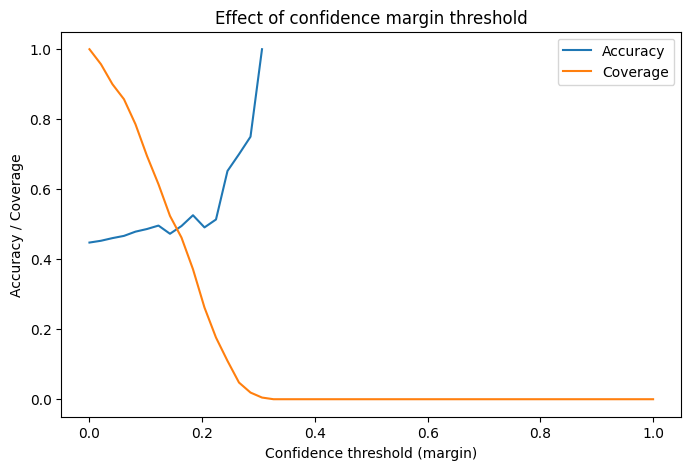

In [52]:
import torch.nn.functional as F
probs = F.softmax(logits, dim=1).numpy()  # shape [num_samples, num_classes]
label_map = {"2_3": 0, "3_4": 1, "4_6": 2}
y_true = test_df["class_range"].map(label_map).values  # array of ints

# Sort probabilities to get top-2
sorted_probs = np.sort(probs, axis=1)
top1 = sorted_probs[:, -1]
top2 = sorted_probs[:, -2]

margins = top1 - top2

thresholds = np.linspace(0, 1, 50)  # thresholds from 0 to 1
accuracies = []
coverages = []

y_pred = probs.argmax(axis=1)

for t in thresholds:
    mask = margins >= t        # only select predictions with margin >= threshold
    if mask.sum() == 0:
        accuracies.append(np.nan)
        coverages.append(0)
        continue
    acc = (y_pred[mask] == y_true[mask]).mean()
    coverage = mask.mean()     # fraction of samples above threshold
    accuracies.append(acc)
    coverages.append(coverage)

plt.figure(figsize=(8,5))
plt.plot(thresholds, accuracies, label='Accuracy')
plt.plot(thresholds, coverages, label='Coverage')
plt.xlabel('Confidence threshold (margin)')
plt.ylabel('Accuracy / Coverage')
plt.title('Effect of confidence margin threshold')
plt.legend()
plt.show()


In [53]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, classification_report

# probs and y_true are already defined from your code
threshold = 0.2

# predicted class and top-2 margin
y_pred = probs.argmax(axis=1)
sorted_probs = np.sort(probs, axis=1)
top1 = sorted_probs[:, -1]
top2 = sorted_probs[:, -2]
margins = top1 - top2

# select confident predictions
mask = margins >= threshold
y_pred_conf = y_pred[mask]
y_true_conf = y_true[mask]

# compute metrics
print("Accuracy (confident predictions):", accuracy_score(y_true_conf, y_pred_conf))
print("F1 (confident predictions):", f1_score(y_true_conf, y_pred_conf, average="weighted"))

labels = [0, 1, 2]  # all class indices
target_names = ["2_3", "3_4", "4_6"]

print(classification_report(
    y_true_conf,
    y_pred_conf,
    labels=labels,        # explicitly specify all classes
    target_names=target_names,
    zero_division=0       # sets metrics to 0 if class is missing
))

# coverage info
num_kept = len(y_pred_conf)
total = len(y_true)
print(f"Number of predictions kept: {num_kept} / {total} ({num_kept/total*100:.1f}%)")


Accuracy (confident predictions): 0.4745762711864407
F1 (confident predictions): 0.3054743814533411
              precision    recall  f1-score   support

         2_3       0.00      0.00      0.00         7
         3_4       0.00      0.00      0.00        24
         4_6       0.47      1.00      0.64        28

    accuracy                           0.47        59
   macro avg       0.16      0.33      0.21        59
weighted avg       0.23      0.47      0.31        59

Number of predictions kept: 59 / 210 (28.1%)


/tmp/ipython-input-3761176687.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="error_type", data=misclassified, palette=["skyblue", "salmon"])


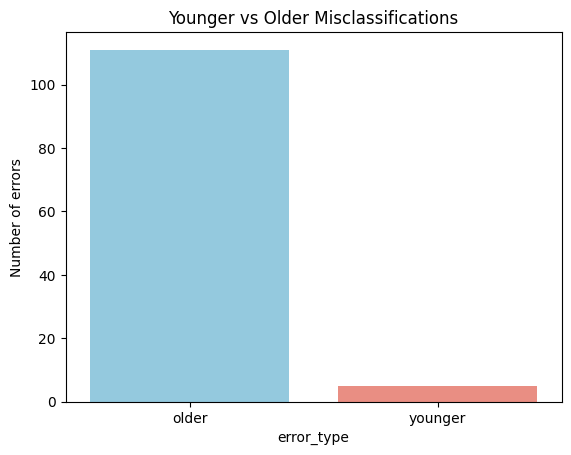

In [105]:
label_order = ["2_3", "3_4", "4_6"]
label_to_num = {label: i for i, label in enumerate(label_order)}

# Convert labels to numbers
misclassified["true_num"] = misclassified["class_range"].map(label_to_num)
misclassified["pred_num"] = misclassified["pred_class"].map(label_to_num)

# Compare: predicted < true → younger, predicted > true → older
misclassified["error_type"] = misclassified.apply(
    lambda row: "younger" if row["pred_num"] < row["true_num"]
    else ("older" if row["pred_num"] > row["true_num"] else "same"), axis=1
)

import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="error_type", data=misclassified, palette=["skyblue", "salmon"])
plt.title("Younger vs Older Misclassifications")
plt.ylabel("Number of errors")
plt.show()


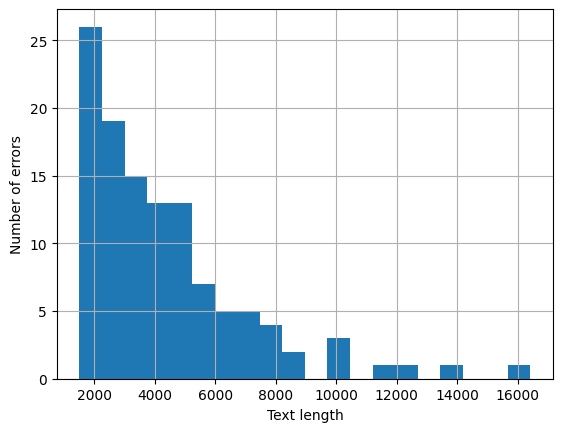

In [106]:
misclassified["text_len"] = misclassified["child_text"].apply(len)
misclassified["text_len"].hist(bins=20)
plt.xlabel("Text length")
plt.ylabel("Number of errors")
plt.show()

In [107]:
class_counts = misclassified["class_range"].value_counts()
total_class_counts = test_df["class_range"].value_counts()
error_rate = class_counts / total_class_counts
print(error_rate)


class_range
2_3    0.920635
3_4    1.000000
4_6         NaN
Name: count, dtype: float64


# Error Analysis full fine tuning model:

In [63]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

model_path = "/content/drive/MyDrive/age_classification_models/model_full_finetune_filtered1500"
# Load tokenizer from the original pretrained model
pretrained_model_name = "prajjwal1/bert-tiny"
tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_path)
model.eval()  # put in evaluation mode


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 128, padding_idx=0)
      (position_embeddings): Embedding(512, 128)
      (token_type_embeddings): Embedding(2, 128)
      (LayerNorm): LayerNorm((128,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-1): 2 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=128, out_features=128, bias=True)
              (key): Linear(in_features=128, out_features=128, bias=True)
              (value): Linear(in_features=128, out_features=128, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=128, out_features=128, bias=True)
              (LayerNorm): LayerNorm((128,), eps=1e-1

In [64]:
import pandas as pd

test_path = "/content/drive/MyDrive/age classification/test_filtered_1500.csv"
test_df = pd.read_csv(test_path)


In [65]:
def tokenize_texts(texts, max_length=512):
    return tokenizer(
        texts.tolist(),
        padding="max_length",
        truncation=True,
        max_length=max_length,
        return_tensors="pt"
    )

test_encodings = tokenize_texts(test_df["child_text"])


In [66]:
with torch.no_grad():
    outputs = model(**test_encodings)
    logits = outputs.logits
    preds = torch.argmax(logits, dim=1).numpy()


In [67]:
label_map = {0: "2_3", 1: "3_4", 2: "4_6"}
pred_labels = [label_map[p] for p in preds]

# Add predictions to dataframe
test_df["pred_class"] = pred_labels

# Compare to true class
misclassified = test_df[test_df["pred_class"] != test_df["class_range"]].copy()

print(f"Number of errors: {len(misclassified)}")
misclassified.head(20)  # view first 10 errors


Number of errors: 69


,child_text,class_range,text_len,pred_class
3,alright give me the fish. I love fish. okay. D...,3_4,3919,4_6
4,"and it sings. no?. yeah , see your toys. a toy...",2_3,5334,3_4
5,kay. want the green. awoh he left this one. ye...,2_3,1892,4_6
6,yeah. what is in here?. book!. will you read i...,2_3,2938,4_6
7,what. p l. UNRECOGNIZED_WORD. l. l. i. c. e. w...,3_4,3603,2_3
8,ship. I don't know. maybe it's a ferryboat. ma...,3_4,5498,4_6
10,there's a snake. goodness gracious UNRECOGNIZE...,2_3,3694,4_6
12,me. and it's over now. thank you. yep. my birt...,2_3,3416,4_6
15,the frog is saying where are you?. frog where ...,4_6,3328,2_3
16,they're all put away. not going to play with t...,3_4,5130,2_3


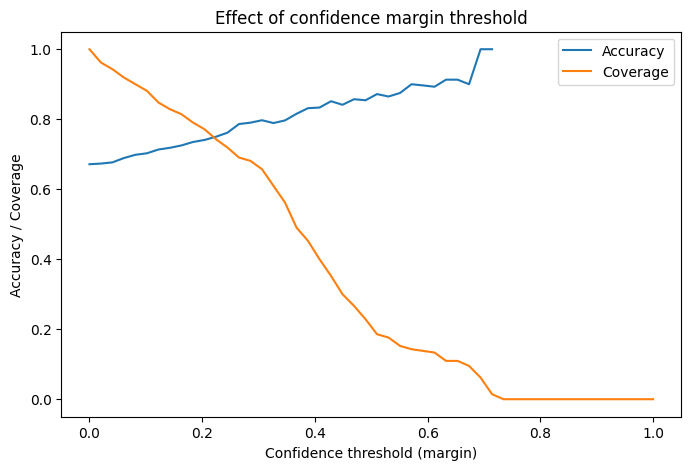

In [68]:
import torch.nn.functional as F
probs = F.softmax(logits, dim=1).numpy()  # shape [num_samples, num_classes]
label_map = {"2_3": 0, "3_4": 1, "4_6": 2}
y_true = test_df["class_range"].map(label_map).values  # array of ints

# Sort probabilities to get top-2
sorted_probs = np.sort(probs, axis=1)
top1 = sorted_probs[:, -1]
top2 = sorted_probs[:, -2]

margins = top1 - top2


thresholds = np.linspace(0, 1, 50)  # thresholds from 0 to 1
accuracies = []
coverages = []

y_pred = probs.argmax(axis=1)

for t in thresholds:
    mask = margins >= t        # only select predictions with margin >= threshold
    if mask.sum() == 0:
        accuracies.append(np.nan)
        coverages.append(0)
        continue
    acc = (y_pred[mask] == y_true[mask]).mean()
    coverage = mask.mean()     # fraction of samples above threshold
    accuracies.append(acc)
    coverages.append(coverage)

plt.figure(figsize=(8,5))
plt.plot(thresholds, accuracies, label='Accuracy')
plt.plot(thresholds, coverages, label='Coverage')
plt.xlabel('Confidence threshold (margin)')
plt.ylabel('Accuracy / Coverage')
plt.title('Effect of confidence margin threshold')
plt.legend()
plt.show()


In [70]:
import numpy as np
from sklearn.metrics import accuracy_score, f1_score, classification_report

# probs and y_true are already defined
threshold = 0.2

# predicted class and top-2 margin
y_pred = probs.argmax(axis=1)
sorted_probs = np.sort(probs, axis=1)
top1 = sorted_probs[:, -1]
top2 = sorted_probs[:, -2]
margins = top1 - top2

# select confident predictions
mask = margins >= threshold
y_pred_conf = y_pred[mask]
y_true_conf = y_true[mask]

# compute metrics
print("Accuracy (confident predictions):", accuracy_score(y_true_conf, y_pred_conf))
print("F1 (confident predictions):", f1_score(y_true_conf, y_pred_conf, average="weighted"))

labels = [0, 1, 2]  # all class indices
target_names = ["2_3", "3_4", "4_6"]

print(classification_report(
    y_true_conf,
    y_pred_conf,
    labels=labels,        # explicitly specify all classes
    target_names=target_names,
    zero_division=0       # sets metrics to 0 if class is missing
))

# coverage info
num_kept = len(y_pred_conf)
total = len(y_true)
print(f"Number of predictions kept: {num_kept} / {total} ({num_kept/total*100:.1f}%)")


Accuracy (confident predictions): 0.7407407407407407
F1 (confident predictions): 0.6583286583286583
              precision    recall  f1-score   support

         2_3       0.83      0.88      0.86        51
         3_4       1.00      0.03      0.05        36
         4_6       0.69      0.99      0.81        75

    accuracy                           0.74       162
   macro avg       0.84      0.63      0.57       162
weighted avg       0.80      0.74      0.66       162

Number of predictions kept: 162 / 210 (77.1%)


In [97]:
misclassified

,child_text,class_range,text_len,pred_class
3,alright give me the fish. I love fish. okay. D...,3_4,3919,4_6
4,"and it sings. no?. yeah , see your toys. a toy...",2_3,5334,3_4
5,kay. want the green. awoh he left this one. ye...,2_3,1892,4_6
6,yeah. what is in here?. book!. will you read i...,2_3,2938,4_6
7,what. p l. UNRECOGNIZED_WORD. l. l. i. c. e. w...,3_4,3603,2_3
...,...,...,...,...
201,what's that?. UNRECOGNIZED_WORD. plate. UNRECO...,3_4,2406,2_3
202,this!. a dinosaur. UNRECOGNIZED_WORD cannot pu...,4_6,1775,3_4
203,we read that at my school. I read that at my s...,3_4,1534,4_6
208,okay. okay. yeah. okay. the frog. he got caugh...,3_4,4358,4_6


/tmp/ipython-input-1503029151.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="error_type", data=misclassified, palette=["skyblue", "salmon"])


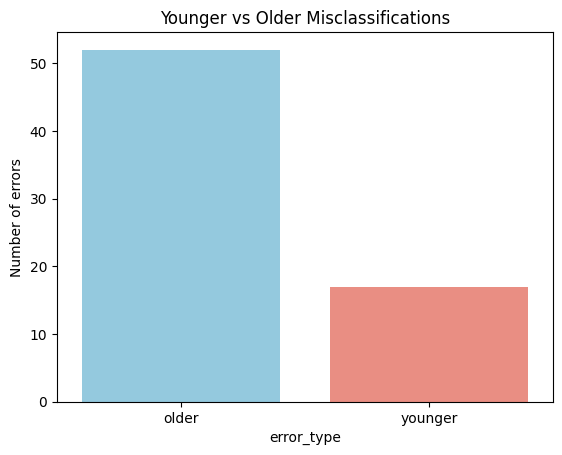

In [100]:
label_order = ["2_3", "3_4", "4_6"]
label_to_num = {label: i for i, label in enumerate(label_order)}

# Convert labels to numbers
misclassified["true_num"] = misclassified["class_range"].map(label_to_num)
misclassified["pred_num"] = misclassified["pred_class"].map(label_to_num)

# Compare: predicted < true → younger, predicted > true → older
misclassified["error_type"] = misclassified.apply(
    lambda row: "younger" if row["pred_num"] < row["true_num"]
    else ("older" if row["pred_num"] > row["true_num"] else "same"), axis=1
)
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="error_type", data=misclassified, palette=["skyblue", "salmon"])
plt.title("Younger vs Older Misclassifications")
plt.ylabel("Number of errors")
plt.show()


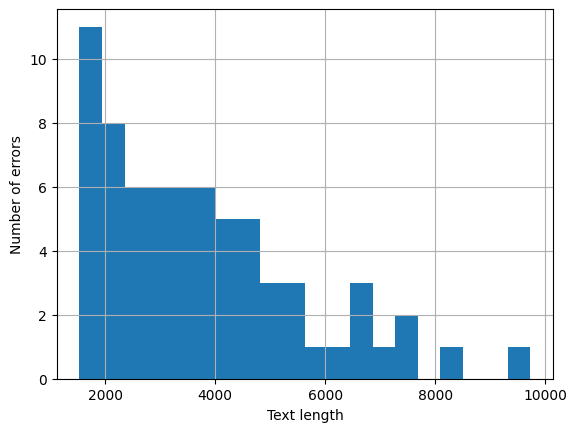

In [101]:
misclassified["text_len"] = misclassified["child_text"].apply(len)
misclassified["text_len"].hist(bins=20)
plt.xlabel("Text length")
plt.ylabel("Number of errors")
plt.show()



In [102]:
class_counts = misclassified["class_range"].value_counts()
total_class_counts = test_df["class_range"].value_counts()
error_rate = class_counts / total_class_counts
print(error_rate)


class_range
2_3    0.174603
3_4    0.913793
4_6    0.056180
Name: count, dtype: float64


In [103]:
# For misclassified set
all_words_mis = misclassified["child_text"].str.split().explode()  # splits each text into words and flattens
num_unrecognized_mis = (all_words_mis == "UNRECOGNIZED_WORD").sum()
total_words_mis = len(all_words_mis)

print("Misclassified with 'UNRECOGNIZED_WORD':", num_unrecognized_mis)
print("Percentage:", 100 * num_unrecognized_mis / total_words_mis, "%")

# For test set
all_words_test = test_df["child_text"].str.split().explode()
num_unrecognized_test = (all_words_test == "UNRECOGNIZED_WORD").sum()
total_words_test = len(all_words_test)

print("Test set with 'UNRECOGNIZED_WORD':", num_unrecognized_test)
print("Percentage:", 100 * num_unrecognized_test / total_words_test, "%")


Misclassified with 'UNRECOGNIZED_WORD': 458
Percentage: 0.9429494966132054 %
Test set with 'UNRECOGNIZED_WORD': 1748
Percentage: 1.117239880606173 %
